In [115]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [116]:
# import data for seasonal rankings
rankings_path = 'Data/Team/Rankings/regular/*'
df_rankings = []

for file in glob.iglob(rankings_path):
    frame = pd.read_csv(file,sep=';')
    frame['Season'] = file[27:32]
    df_rankings.append(frame)
df_rankings = pd.concat(df_rankings)
df_rankings.head(10)

,﻿R,Team,GP,W,OTW,SOW,SOL,OTL,L,GF,GA,GDF,PTS,Season
0,1,SC Bern,50,30,4,0,2,3,11,187,136,51,103,08-09
1,2,ZSC Lions,50,26,3,5,0,3,13,176,149,27,97,08-09
2,3,Kloten Flyers,50,27,3,3,2,1,14,174,130,44,96,08-09
3,4,HC Davos,50,25,3,3,3,2,14,184,135,49,92,08-09
4,5,HC Lugano,50,19,4,4,5,2,16,175,156,19,80,08-09
5,6,Genève-Servette HC,50,22,5,0,2,0,21,157,140,17,78,08-09
6,7,Fribourg-Gottéron,50,19,3,4,1,3,20,154,143,11,75,08-09
7,8,EV Zug,50,20,1,2,2,3,22,171,166,5,71,08-09
8,9,SCL Tigers,50,19,2,3,1,1,24,170,180,-10,69,08-09
9,10,SC Rapperswil-Jona Lakers,50,14,0,1,2,3,30,143,208,-65,49,08-09


In [117]:
# helper to sort plots by median rank/pts
temp = df_rankings.groupby('Team').agg({'\ufeffR': 'median', 'PTS': 'median'})
t1 = temp.sort_values(by='\ufeffR',inplace=False)
t2 = temp.sort_values(by='PTS',ascending=False)

In [118]:
df_rankings_grouped = df_rankings.groupby(by=['Team', 'Season'], as_index=True).agg({'\ufeffR': 'first', 'PTS': 'first'})
df_rankings.drop(['GP','Team','W','OTW','SOW','SOL','OTL','L','GF','GA','GDF','PTS','Season'],axis=1,inplace=True)

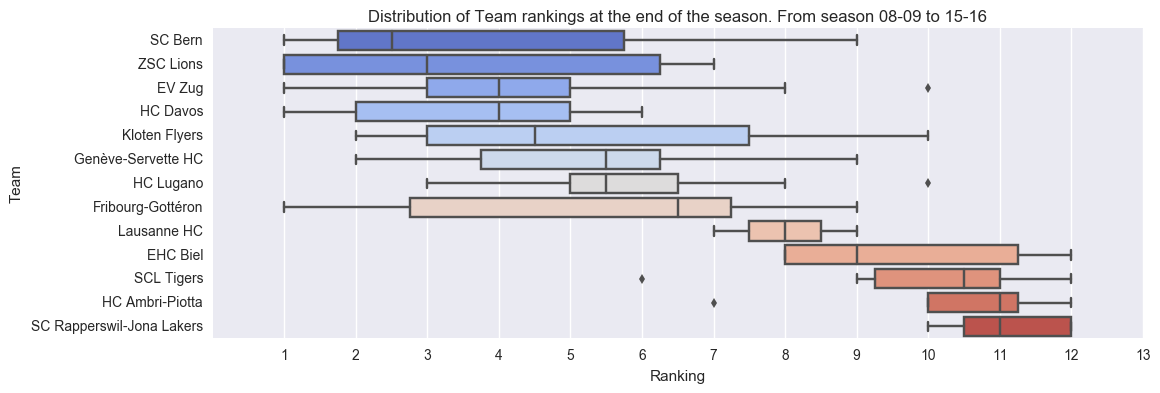

In [119]:
# plot
plt.figure(figsize=(12,4))
ax = sns.boxplot(x='\ufeffR', y='Team',data=df_rankings_grouped.reset_index(), orient="h", palette='coolwarm', order=t1.index)
ax.set_xlabel('Ranking')
ax.set_xticks(np.arange(1,14))
ax.set_title('Distribution of Team rankings at the end of the season. From season 08-09 to 15-16');

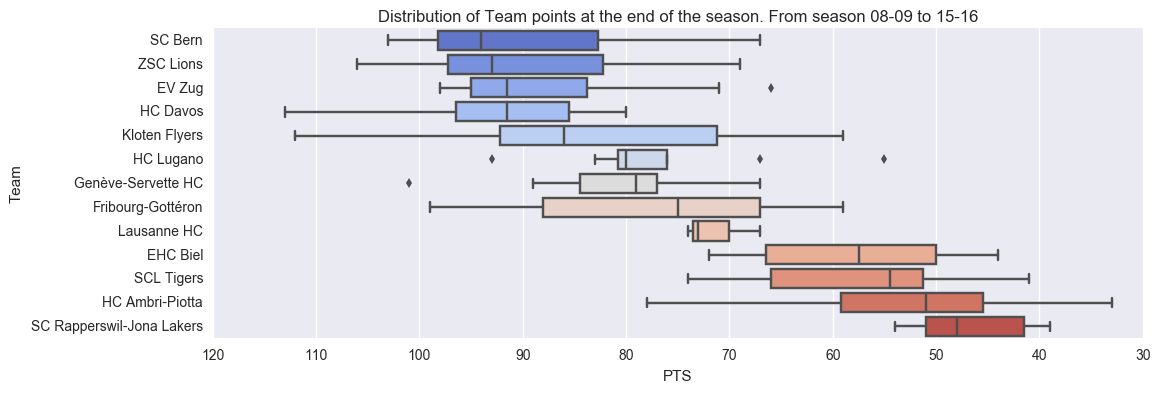

In [120]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x='PTS', y='Team',data=df_rankings_grouped.reset_index(), orient="h", palette='coolwarm', order=t2.index)
ax.set_xlabel('PTS')
ax.invert_xaxis()
#ax.set_xticks(np.arange(1,14))
ax.set_title('Distribution of Team points at the end of the season. From season 08-09 to 15-16');

In [121]:
playoff_ranks = [5,5,2,1,5,5,3,3,
                1,2,3,5,3,5,5,5,
                1,2,3,3,5,5,5,5,
                3,5,3,5,2,5,1,5,
                2,1,3,3,5,5,5,5,
                1,3,2,3,5,5,5,5,
                2,3,5,5,1,3,5,5,
                5,3,3,5,1,5,5,1]
df_rankings = df_rankings[df_rankings['\ufeffR'] <= 8]
df_rankings['playoff'] = playoff_ranks
df_rankings.rename(columns={'playoff' : 'rank_PO', '\ufeffR' : 'rank_RE'},inplace=True)
df_rankings['number'] = 20
df_rankings_agg = df_rankings.groupby(['rank_RE', 'rank_PO']).agg({'number' : 'sum'}).reset_index()

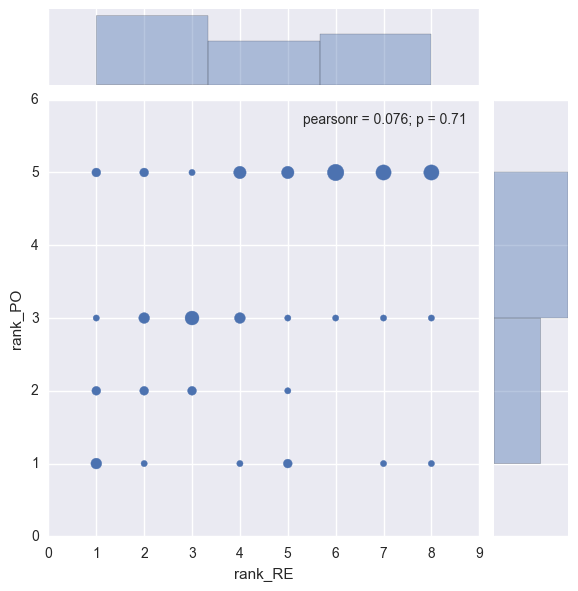

In [124]:
sns.jointplot(x=df_rankings_agg['rank_RE'],y=df_rankings_agg['rank_PO'], s=df_rankings_agg['number'])